## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Loading Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Data Preprocessing

In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

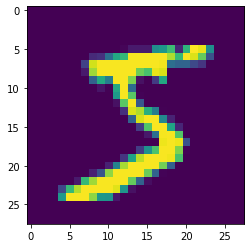

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [5]:
y_train[0]

5

### One-hot encoding

In [6]:
# now we have to one hot encode the output labels since the output is between 0 to 9
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### Feature Scaling

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)/255.0     # 28*28 = 784
# we divided by 255 because the datain every cell is between 0 to 255, so we had to normalise it
x_train.shape

(60000, 28, 28, 1)

In [8]:
# similarly
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)/255.0
x_test.shape

(10000, 28, 28, 1)

## Defining Model

it'll be :<br>Input----->Conv(32)----->MaxPool----->Conv(64)----->MaxPool----->Dense----->Output(10)

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # kernel means filter
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.8),
        layers.Dense(10, activation="softmax"),
    ]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Compiling Model

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Training Model

In [12]:
model.fit(x_train, y_train, batch_size=1000, epochs=20)

Epoch 1/20
60/60 [==============================] - 41s 664ms/step - loss: 1.2107 - accuracy: 0.6074
Epoch 2/20
60/60 [==============================] - 26s 435ms/step - loss: 0.3522 - accuracy: 0.8922
Epoch 3/20
60/60 [==============================] - 25s 422ms/step - loss: 0.2451 - accuracy: 0.9264
Epoch 4/20
60/60 [==============================] - 25s 416ms/step - loss: 0.1975 - accuracy: 0.9403
Epoch 5/20
60/60 [==============================] - 28s 462ms/step - loss: 0.1727 - accuracy: 0.9485
Epoch 6/20
60/60 [==============================] - 29s 477ms/step - loss: 0.1536 - accuracy: 0.9541
Epoch 7/20
60/60 [==============================] - 27s 445ms/step - loss: 0.1426 - accuracy: 0.9575
Epoch 8/20
60/60 [==============================] - 25s 418ms/step - loss: 0.1328 - accuracy: 0.9601
Epoch 9/20
60/60 [==============================] - 24s 404ms/step - loss: 0.1270 - accuracy: 0.9615
Epoch 10/20
60/60 [==============================] - 24s 405ms/step - loss: 0.1197 - accura

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0367 - accuracy: 0.9876


[0.036707036197185516, 0.9876000285148621]